## DecisionTree

### example for split

![title](4.png)

### entropy and gini

![title](7.png)

![title](8.png)

![title](5.png)

![title](6.png)

### algorithm

![title](1.png)

![title](2.png)

![title](3.png)

### demonstration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 22})
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import math

iris = load_iris()
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier(criterion="gini").fit(X, y)

    plt.figure(figsize=(16,9))
    plt.subplot()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=130)
plt.show()

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(iris.data, iris.target)

# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# # graph.render("iris") 
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=iris.feature_names,  
#                          class_names=iris.target_names,  
#                          filled=True, rounded=True,  
#                          special_characters=True) 
# graph = graphviz.Source(dot_data) 
# graph

## Homework

In [230]:
def dict_of_values(data):
    # TODO Calculate the number of each label.
    # Return a dict with the labels as keys, and
    # their accurances as values
    unique, counts = np.unique(data[:, -1], return_counts=True)
    return dict(zip(unique, counts))

def divide_data(data, feature_column, feature_val):
    data1 = data[data[:, feature_column] < feature_val]
    data2 = data[data[:, feature_column] > feature_val]
    # TODO split the data into two parts by feature_column,
    # where data1 contains all with value at feature column less than
    # feature_value, and data2 contains all values larger that veature_val 
    return data1, data2

def gini(data):
    gini = 1
    total_count = float(len(data))
    #TODO calculate the gini
    counts = dict_of_values(data)
    for lbl in counts:
        prob_of_lbl = counts[lbl] / total_count
        gini -= prob_of_lbl**2
    return gini


# def info_gain(data):
#     entropy_dict = {}
#     for col in range(list(data.shape)[1] -1):
#         data_entropy = entropy(data)
#         unique, counts = np.unique(data[:, col], return_counts=True)
#         for i in range(len(unique)):
#             data_entropy -= (counts[i]/float(len(data))) * entropy(data[data[:, col] == unique[i]])
#         entropy_dict[col] = data_entropy
   
#     print(entropy_dict)
#     return entropy_dict


def entropy(data):
    entropy = 0
    total_count = float(len(data))
    counts = dict_of_values(data)
    for lbl in counts:
        prob_of_lbl = counts[lbl] / total_count
        entropy += -prob_of_lbl*math.log(prob_of_lbl, 2)
    #TODO calculate the entropy
    return entropy

def square_loss(data):
    loss = 0
    total_count = float(len(data))
    mean_y = np.mean(data[:, -1])
    for y in data[:, -1]:
        loss += (y - mean_y)**2
    #TODO calculate the entropy
    return loss/total_count

class DecisionNode(object):
    def __init__(self,
                 column=None,
                 value=None,
                 false_branch=None,
                 true_branch=None,
                 current_results=None,
                 is_leaf=False):
        """
        node of each split
        column is the index of feature by wich data is splitted
        value is column's value by which we filter data into splits
        if true_branch, then it is true branch of it's parent, same for fale_branch
        is_leaf is true when node has no child
        current_Results is dict_of_values(data) for data which reached this node
        """
        
        self.column = column
        self.value = value
        self.false_branch = false_branch
        self.true_branch = true_branch
        self.current_results = current_results
        self.is_leaf = is_leaf

def build_tree(data, current_depth=0, max_depth=4, criterion=gini, task="classification"):
    """
    task can be classification or regression
    criterion is inpurity function to use
    """

    if len(data) == 0:
        return DecisionNode(is_leaf=True)

    if current_depth == max_depth:
        return DecisionNode(current_results=dict_of_values(data), is_leaf=True)
    
    if len(dict_of_values(data)) == 1:
        return DecisionNode(current_results=dict_of_values(data), is_leaf=True)

    
    best_column = 0
    best_value = 0
    stop_splitting = False

    
    criterion_parent = criterion(data)*len(data)
    best_criterion = criterion_parent

    
    for col in range(list(data.shape)[1] -1):
        min_val = min(data[:,col])
        max_val = max(data[:,col])
        step = 0.1 #(max_val - min_val) * 0.1
        for s_val in np.arange(min_val + step, max_val + step, step):
            d1, d2 = divide_data(data, col, s_val)
            best_criterion_1_2 = len(d1)*criterion(d1) + len(d2)*criterion(d2)
            if best_criterion_1_2 < best_criterion:
                best_criterion = best_criterion_1_2
                best_column = col
                best_value = s_val
            
    if best_criterion == criterion_parent:
            stop_splitting = True      
    

    split_neg, split_pos = divide_data(data, best_column, best_value)
    
    # if we cannot improve by splitting:
    if stop_splitting:
        return DecisionNode(current_results=dict_of_values(data), is_leaf=True)
    else:
        return DecisionNode(column=best_column,
                            value=best_value,
                            current_results=dict_of_values(data),
                            false_branch=build_tree(split_neg, current_depth+1, max_depth, criterion, task),
                            true_branch=build_tree(split_pos, current_depth+1, max_depth, criterion, task))


In [231]:
class DecisionTree(object):
    
    def __init__(self, max_tree_depth=4, criterion="gini", task="classification"):
        self.max_depth = max_tree_depth
        self.tree = None
        self.task = task
        
        self.criterion = gini
        if criterion == "entropy":
            self.criterion = entropy
        if criterion == "square_loss":
            self.criterion = square_loss

    def fit(self, X, y):
        # build data
        y = y.reshape((1, X.shape[0]))
        data = np.hstack((X, y.T))
        self.tree = build_tree(data,
                               task=self.task,
                               max_depth=self.max_depth, 
                               criterion=self.criterion)
        return self
    
  
    def predict_sample(self, tree, sample):
        if sample[tree.column] < tree.value:

            if  not tree.false_branch.is_leaf:
                return self.predict_sample(tree.false_branch, sample)
            else:
                return tree.false_branch
        else:
            if  not tree.true_branch.is_leaf:
                return self.predict_sample(tree.true_branch,sample)
            else:
                return tree.true_branch
            
            
    def predict(self, X_test):
        self.y_pred = np.array([])
        for i in X_test:
            dn = self.predict_sample(self.tree, i)
            d = dn.current_results
            if self.task == "classification":
                pred = max(d, key=d.get)
            if self.task == "regression":
                pred = mean(sum(d.values()))
            self.y_pred = np.append(self.y_pred, pred)
        return self.y_pred

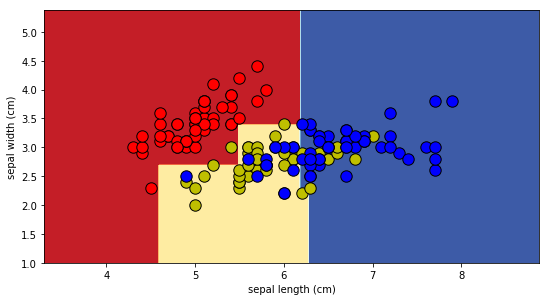

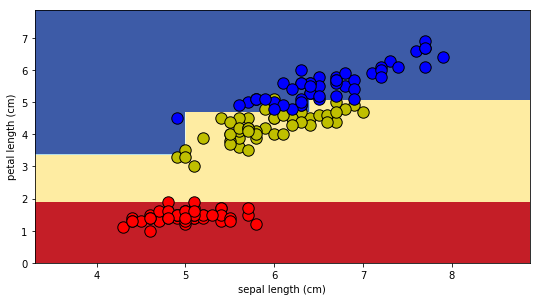

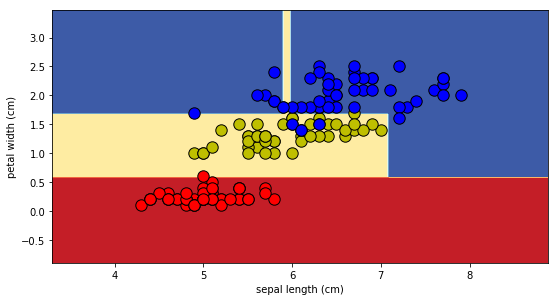

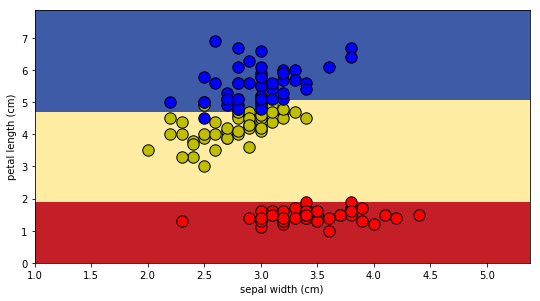

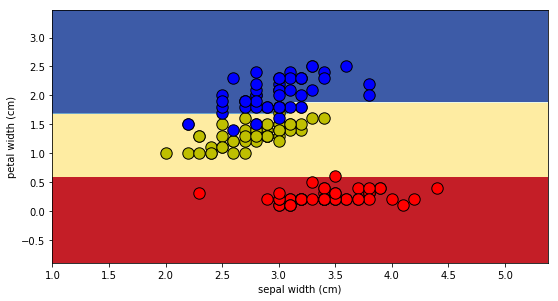

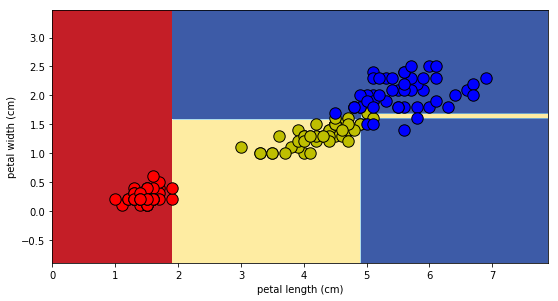

In [234]:
try:
    iris = load_iris()
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
        X = iris.data[:, pair]
        y = iris.target

        clf = DecisionTree(criterion="gini").fit(X, y)

        plt.figure(figsize=(8,4.5))
        plt.subplot()
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        for i, color in zip(range(3), "ryb"):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=130)
    plt.show()
except:
    print("Hmm, something is wrong :[")

In [232]:
iris = load_iris()

X = iris.data[:, [0, 1]]
y = iris.target
y = y.reshape((1, X.shape[0]))

data = np.hstack((X, y.T))

entropy(data)

1.584962500721156